In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

dataset=pd.read_csv("/content/drive/MyDrive/SNU Research/Tinnitus/Tinnitus_ALR&EEG_2022.08.26_final.csv")
 
#dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/Latest/Tinnitus_ALR&EEG_2022.08.26_final.csv")

classes = np.array(sorted(list(set(dataset.iloc[:, 1]))))

In [ ]:
dataset.head()

,Subjects,SubjectTypeClass,TestType,n0_gap_peak_ms_20ms,p1_gap_peak_ms_20ms,n1_gap_peak_ms_20ms,p2_gap_peak_ms_20ms,n2_gap_peak_ms_20ms,p3_gap_peak_ms_20ms,n0_nogap_peak_ms_20ms,...,MeanP_Gamma_50ms,TotalEEGPower_50ms,RelativeAlpha_50ms,RelativeBeta_50ms,RelativeTheta_50ms,RelativeDelta_50ms,DTR_50ms,DTABR_50ms,ATR_50ms,ABR_50ms
0,'06_HSO_60_01',Control,Test,96,177,213,304,425,135,175,...,4.670000e-07,0.000055,0.0949,0.0372,0.387,0.481,1.240,6.57,0.245,2.55
1,'06_LSR_34_01',Control,Test,108,151,219,282,390,126,152,...,5.330000e-07,0.000047,0.1210,0.0500,0.419,0.410,0.979,4.83,0.290,2.43
2,'07_KHJ_33_02',Control,Test,123,195,246,275,456,99,166,...,2.890000e-05,0.000778,0.0805,0.0527,0.301,0.566,1.880,6.51,0.268,1.53
3,'08_LJS_26_01',Control,Test,98,163,212,320,416,134,197,...,5.990000e-07,0.000075,0.0885,0.0397,0.354,0.518,1.460,6.80,0.250,2.23
4,'09_JBH_58_01',Control,Test,127,166,206,271,386,119,153,...,8.390000e-07,0.000074,0.1090,0.0564,0.392,0.442,1.130,5.04,0.278,1.93


In [ ]:
set(list(dataset['SubjectTypeClass']))

{'Control', 'Patient'}

In [ ]:

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset.iloc[:, 1]=encoder.fit_transform(dataset.iloc[:, 1])

In [ ]:
set(list(dataset['SubjectTypeClass']))

{0, 1}

#Feature Selection (User Defined with Index Range)


*   Index- [245]  to  [274] -> EEG Features
*   Index- [4]    to  [243] -> Normal Features



In [ ]:
'''
list_of_feat=[]
norm_start=int(input("Normal Features Start Index:"))
norm_end=int(input("Normal Features End Index:"))
eeg_start=int(input("EEG Features Start Index:"))
eeg_end=int(input("EEG Features End Index:"))



list_of_feat=list(dataset.iloc[:0,norm_start:norm_end])+list(dataset.iloc[:0,eeg_start:eeg_end])
'''

'\nlist_of_feat=[]\nnorm_start=int(input("Normal Features Start Index:"))\nnorm_end=int(input("Normal Features End Index:"))\neeg_start=int(input("EEG Features Start Index:"))\neeg_end=int(input("EEG Features End Index:"))\n\n\n\nlist_of_feat=list(dataset.iloc[:0,norm_start:norm_end])+list(dataset.iloc[:0,eeg_start:eeg_end])\n'

#Feature Selection (User Defined with Individual Feature)

**Please Input 'Subject' colunm name first**

In [ ]:
'''list_of_feat=[]
num=int(input("Input number of features: "))

for i in range(num):
  print(i+1,".")
  list_of_feat.append(input("Feature Name: "))'''


'list_of_feat=[]\nnum=int(input("Input number of features: "))\n\nfor i in range(num):\n  print(i+1,".")\n  list_of_feat.append(input("Feature Name: "))'

#Feature Selection (Model Free)

<font color='red'> Warning: Run only one Type at a time</font>

**Type-1**

In [ ]:
'''from sklearn.feature_selection import SelectKBest
bestfeatures_1 = SelectKBest(k=10)
fit = bestfeatures_1.fit(X_,y_)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']'''


"from sklearn.feature_selection import SelectKBest\nbestfeatures_1 = SelectKBest(k=10)\nfit = bestfeatures_1.fit(X_,y_)\ndfscores = pd.DataFrame(fit.scores_)\ndfcolumns = pd.DataFrame(X_.columns)\nfeatureScores = pd.concat([dfcolumns,dfscores],axis=1)\nfeatureScores.columns = ['Specs','Score']"

**Type-2**

In [ ]:
'''
from sklearn.feature_selection import SelectKBest,f_classif
bestfeatures_2=SelectKBest(f_classif, k=10)
fit = bestfeatures_f2fit(X_,y_)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
'''

"\nfrom sklearn.feature_selection import SelectKBest,f_classif\nbestfeatures_2=SelectKBest(f_classif, k=10)\nfit = bestfeatures_f2fit(X_,y_)\ndfscores = pd.DataFrame(fit.scores_)\ndfcolumns = pd.DataFrame(X_.columns)\nfeatureScores = pd.concat([dfcolumns,dfscores],axis=1)\nfeatureScores.columns = ['Specs','Score']\n"

**Type-3**

In [ ]:
'''
from sklearn.feature_selection import SelectFpr, f_classif

bestfeatures_3=SelectFpr(f_classif, alpha=0.1)
fit = bestfeatures_3.fit(X_,y_)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
'''

"\nfrom sklearn.feature_selection import SelectFpr, f_classif\n\nbestfeatures_3=SelectFpr(f_classif, alpha=0.1)\nfit = bestfeatures_3.fit(X_,y_)\ndfscores = pd.DataFrame(fit.scores_)\ndfcolumns = pd.DataFrame(X_.columns)\nfeatureScores = pd.concat([dfcolumns,dfscores],axis=1)\nfeatureScores.columns = ['Specs','Score']\n"

<font color='blue' size=6><b>Input</b></font>

In [ ]:
'''number_of_feat=int(input("Number Of Best Features: "))'''

'number_of_feat=int(input("Number Of Best Features: "))'

In [ ]:
'''imp=featureScores.nlargest(number_of_feat,'Score')
print(imp)'''

"imp=featureScores.nlargest(number_of_feat,'Score')\nprint(imp)"

In [ ]:
'''
list_of_feat=[]

for i in range(number_of_feat):
  list_of_feat.append(imp.iloc[:,0:1].values[i][0])
  '''

'\nlist_of_feat=[]\n\nfor i in range(number_of_feat):\n  list_of_feat.append(imp.iloc[:,0:1].values[i][0])\n  '

#Feature Selection (Model Based)

<font color='blue' size=6><b>Input</b></font>

In [ ]:
'''number_of_feat=int(input("Number Of Best Features: "))'''

'number_of_feat=int(input("Number Of Best Features: "))'

In [ ]:
'''from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=number_of_feat)
sfs.fit(X_, y_)
list_of_feat=[]
list_of_feat=list(sfs.get_feature_names_out(list(dataset.iloc[:0,4:])))'''

'from sklearn.feature_selection import SequentialFeatureSelector\nfrom sklearn.neighbors import KNeighborsClassifier\nknn = KNeighborsClassifier(n_neighbors=3)\nsfs = SequentialFeatureSelector(knn, n_features_to_select=number_of_feat)\nsfs.fit(X_, y_)\nlist_of_feat=[]\nlist_of_feat=list(sfs.get_feature_names_out(list(dataset.iloc[:0,4:])))'

#Data Spliting

You can remove it. I added for not to input all the features for every runtime

In [ ]:
list_of_feat=["Subjects",
              "p3_gap_peak_amp_20ms",
    "p3_gap_peak_amp_50ms",
    "p1_gap_peak_amp_20ms",
    "p1_gap_peak_amp_50ms",
    "gap_AUC_n1p2_R_20ms",
    "gap_AUC_n1p2_R_50ms",
    "n1p3_interval_nogap_20ms",
    "n1p3_interval_nogap_50ms",
    "n2_gap_peak_amp_20ms",
    "n2_gap_peak_amp_50ms",
    "p2n2_gap_nogap_diff_20ms",
    "p2n2_gap_nogap_diff_50ms",
    "gap_AUC_n1p2_L_20ms",
    "gap_AUC_n1p2_L_50ms",
    "gap_AUC_p1n1_R_20ms",
    "gap_AUC_p1n1_R_50ms",
    "gap_AUC_n1p2n2_20ms",
    "gap_AUC_n1p2n2_50ms",
    "n2_nogap_peak_ms_20ms",
    "n2_nogap_peak_ms_50ms",
    "n1p2_gap_no_gap_ratio_20ms",
    "n1p2_gap_no_gap_ratio_50ms",
    "p2n2_gap_no_gap_ratio_20ms",
    "p2n2_gap_no_gap_ratio_50ms",
    "p1p2_interval_nogap_20ms",
    "p1p2_interval_nogap_50ms",
    "p1n1_nogap_diff_20ms",
    "p1n1_nogap_diff_50ms",
    "n0n2_interval_nogap_20ms",
    "n0n2_interval_nogap_50ms",
    "PeakF_Theta_20ms",
    "PeakF_Theta_50ms",
    "SpectralEdge_Delta_20ms",
    "SpectralEdge_Delta_50ms",
    "RelativeAlpha_20ms",
    "RelativeAlpha_50ms",
    "DTABR_20ms",
    "DTABR_50ms"]

print(len(list_of_feat))

39


In [ ]:
print(list_of_feat)

['Subjects', 'p3_gap_peak_amp_20ms', 'p3_gap_peak_amp_50ms', 'p1_gap_peak_amp_20ms', 'p1_gap_peak_amp_50ms', 'gap_AUC_n1p2_R_20ms', 'gap_AUC_n1p2_R_50ms', 'n1p3_interval_nogap_20ms', 'n1p3_interval_nogap_50ms', 'n2_gap_peak_amp_20ms', 'n2_gap_peak_amp_50ms', 'p2n2_gap_nogap_diff_20ms', 'p2n2_gap_nogap_diff_50ms', 'gap_AUC_n1p2_L_20ms', 'gap_AUC_n1p2_L_50ms', 'gap_AUC_p1n1_R_20ms', 'gap_AUC_p1n1_R_50ms', 'gap_AUC_n1p2n2_20ms', 'gap_AUC_n1p2n2_50ms', 'n2_nogap_peak_ms_20ms', 'n2_nogap_peak_ms_50ms', 'n1p2_gap_no_gap_ratio_20ms', 'n1p2_gap_no_gap_ratio_50ms', 'p2n2_gap_no_gap_ratio_20ms', 'p2n2_gap_no_gap_ratio_50ms', 'p1p2_interval_nogap_20ms', 'p1p2_interval_nogap_50ms', 'p1n1_nogap_diff_20ms', 'p1n1_nogap_diff_50ms', 'n0n2_interval_nogap_20ms', 'n0n2_interval_nogap_50ms', 'PeakF_Theta_20ms', 'PeakF_Theta_50ms', 'SpectralEdge_Delta_20ms', 'SpectralEdge_Delta_50ms', 'RelativeAlpha_20ms', 'RelativeAlpha_50ms', 'DTABR_20ms', 'DTABR_50ms']


In [ ]:
X_new = dataset[list_of_feat]
y_new = dataset.iloc[:, 1]

In [ ]:
X_new.shape

(165, 39)

In [ ]:
y_new.shape

(165,)

In [ ]:
'''from sklearn.model_selection import train_test_split
X_train_with_subject, X_test_with_subject, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.10655737705, random_state = 0)'''

'from sklearn.model_selection import train_test_split\nX_train_with_subject, X_test_with_subject, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.10655737705, random_state = 0)'

In [ ]:
X_train_with_subject=X_new.iloc[:130,:]  
X_test_with_subject=X_new.iloc[130:,:]
y_train=y_new.iloc[:130]
y_test=y_new.iloc[130:]

In [ ]:
X_train_with_subject

,Subjects,p3_gap_peak_amp_20ms,p3_gap_peak_amp_50ms,p1_gap_peak_amp_20ms,p1_gap_peak_amp_50ms,gap_AUC_n1p2_R_20ms,gap_AUC_n1p2_R_50ms,n1p3_interval_nogap_20ms,n1p3_interval_nogap_50ms,n2_gap_peak_amp_20ms,...,n0n2_interval_nogap_20ms,n0n2_interval_nogap_50ms,PeakF_Theta_20ms,PeakF_Theta_50ms,SpectralEdge_Delta_20ms,SpectralEdge_Delta_50ms,RelativeAlpha_20ms,RelativeAlpha_50ms,DTABR_20ms,DTABR_50ms
0,'06_HSO_60_01',10.092901,10.988888,10.379415,8.422405,0.108394,0.229010,6.555694,4.761199,11.544318,...,-0.572352,-1.793864,3.891052,3.891052,4.280156,4.280156,0.0887,0.0949,6.64,6.57
1,'06_LSR_34_01',17.845904,11.594803,16.052158,9.174875,0.147754,0.185048,11.405960,5.217714,17.548932,...,-1.055475,-0.194512,3.891052,3.891052,4.280156,4.280156,0.0864,0.1210,7.06,4.83
2,'07_KHJ_33_02',5.955162,6.788743,3.959968,5.523335,0.264380,0.073321,5.046243,4.065167,6.958529,...,-1.086889,-0.721649,4.280156,5.058368,4.669262,4.669262,0.0783,0.0805,6.57,6.51
3,'08_LJS_26_01',5.638387,7.702433,3.270295,7.462832,0.183007,0.226157,2.104986,3.049172,2.438374,...,-1.247354,0.002735,3.891052,3.501946,3.891050,4.280156,0.1110,0.0885,5.16,6.80
4,'09_JBH_58_01',13.384259,11.459661,10.114451,12.183127,0.123296,0.118154,8.523228,7.317047,11.947191,...,-0.215529,0.238157,4.280156,3.891052,3.891050,4.280156,0.1230,0.1090,4.35,5.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,'68_PJS_62_01_8k',2.687787,2.975237,0.565990,1.660061,0.433053,0.390063,-0.793670,-0.833730,2.365112,...,-1.707377,-10.025550,3.891050,5.058366,3.891050,4.280156,0.1100,0.1190,4.87,4.50
126,'69_KTS_55_01_4k',8.148390,6.811314,7.995180,7.101645,0.093025,0.145446,4.986209,4.045323,7.650185,...,-2.774808,-2.157985,5.836578,3.891050,5.447474,4.669262,0.1930,0.1190,1.41,3.17
127,'70_LSM_47_01_8k',4.776646,7.310949,5.836057,6.804252,0.170094,0.176876,1.885845,3.071032,4.627091,...,-2.902474,-1.265364,5.058366,7.003892,5.058368,5.836578,0.1610,0.1940,2.43,1.35
128,'74_LCN_56_01_8k',4.866784,4.283891,3.488975,1.970176,0.263754,0.450968,0.771491,0.365169,4.150460,...,-1.886306,-7.855250,4.280156,4.280156,5.058368,4.669262,0.0833,0.0908,4.91,5.69


In [ ]:
X_test_with_subject

,Subjects,p3_gap_peak_amp_20ms,p3_gap_peak_amp_50ms,p1_gap_peak_amp_20ms,p1_gap_peak_amp_50ms,gap_AUC_n1p2_R_20ms,gap_AUC_n1p2_R_50ms,n1p3_interval_nogap_20ms,n1p3_interval_nogap_50ms,n2_gap_peak_amp_20ms,...,n0n2_interval_nogap_20ms,n0n2_interval_nogap_50ms,PeakF_Theta_20ms,PeakF_Theta_50ms,SpectralEdge_Delta_20ms,SpectralEdge_Delta_50ms,RelativeAlpha_20ms,RelativeAlpha_50ms,DTABR_20ms,DTABR_50ms
130,'01_AJW_30_02',18.570504,10.328968,10.717372,10.387166,0.221000,0.179161,10.517537,6.694042,15.933612,...,-0.026408,-4.284626,4.669262,3.891052,4.669260,4.669262,0.1750,0.1310,2.670,2.32
131,'01_CGO_63_01',13.065105,17.392671,7.401337,11.729882,0.173179,0.248344,9.423872,10.233087,13.526748,...,-2.850621,-2.184195,4.280158,3.891052,4.669262,4.669262,0.1450,0.1990,2.100,2.01
132,'01_KBJ_45_01',8.066090,9.080847,10.977889,6.612765,0.173175,0.127571,5.063051,5.992582,7.115490,...,-1.989936,1.383691,5.836578,5.058366,6.225684,6.225682,0.1890,0.1130,0.669,1.25
133,'02_KCH_26_02',1.657472,4.444653,4.649785,3.682787,0.514357,0.274621,-1.749806,1.394818,3.584108,...,-0.777961,-1.455677,3.891050,5.058366,5.058368,4.280156,0.0753,0.0702,6.230,9.10
134,'03_HMK_49_01',6.752389,7.269780,5.368919,6.843491,0.159931,0.164341,3.598155,6.055508,6.648775,...,0.619775,-1.459163,4.669262,3.891052,4.669262,3.891050,0.1520,0.1290,2.860,3.88
135,'03_KDY_29_02',16.641427,14.583876,15.122947,8.613766,0.158620,0.152508,8.232836,9.260472,8.410845,...,0.516414,-1.333509,5.447472,3.891050,5.058368,3.891050,0.1670,0.0811,2.920,7.35
136,'03_LSJ_39_01',21.305609,22.306894,18.465936,20.051133,0.130163,0.104776,10.337682,11.002426,12.582861,...,-3.611375,-2.687610,4.280156,4.280156,4.669262,4.280156,0.2200,0.0774,1.570,6.72
137,'04_YBW_30_01',3.757149,6.314481,3.719307,2.658478,0.113199,0.435294,3.895081,4.396880,4.650573,...,0.300290,0.487612,4.280158,4.669262,4.280156,4.669262,0.1220,0.0863,3.940,5.37
138,'05_ACJ_59_01',9.346959,9.751999,8.892264,9.828983,0.085986,0.144222,5.214914,6.855058,8.327830,...,1.321223,0.277313,3.891052,3.501946,4.280156,4.280156,0.0863,0.1240,7.150,4.87
139,'05_AEY_41_01',6.698255,7.821621,7.407543,3.597972,0.085148,0.149940,5.122363,3.545268,9.739846,...,-4.256968,-3.023080,5.058366,6.225680,5.447472,4.280156,0.1020,0.0916,3.320,3.83


In [ ]:
X_train = X_train_with_subject.iloc[:,1:]
X_test  = X_test_with_subject.iloc[:,1:]

In [ ]:
result={}



---





---



#ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_defult = AdaBoostClassifier(random_state=0)
ada_defult.fit(X_train, y_train)
y_pred = ada_defult.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_defult,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)


[[12  7]
 [ 6 10]]
              precision    recall  f1-score   support

           0       0.67      0.63      0.65        19
           1       0.59      0.62      0.61        16

    accuracy                           0.63        35
   macro avg       0.63      0.63      0.63        35
weighted avg       0.63      0.63      0.63        35

Accurecy:  0.6285714285714286


1/200 round completed......................... Accurecy: 0.5714285714285714
2/200 round completed......................... Accurecy: 0.6285714285714286
3/200 round completed......................... Accurecy: 0.7428571428571429
4/200 round completed......................... Accurecy: 0.7142857142857143
5/200 round completed......................... Accurecy: 0.6
6/200 round completed......................... Accurecy: 0.6857142857142857
7/200 round completed......................... Accurecy: 0.6285714285714286
8/200 round completed......................... Accurecy: 0.6285714285714286
9/200 round completed......................... Accurecy: 0.6285714285714286
10/200 round completed......................... Accurecy: 0.6857142857142857
11/200 round completed......................... Accurecy: 0.7142857142857143
12/200 round completed......................... Accurecy: 0.6
13/200 round completed......................... Accurecy: 0.6857142857142857
14/200 round completed................

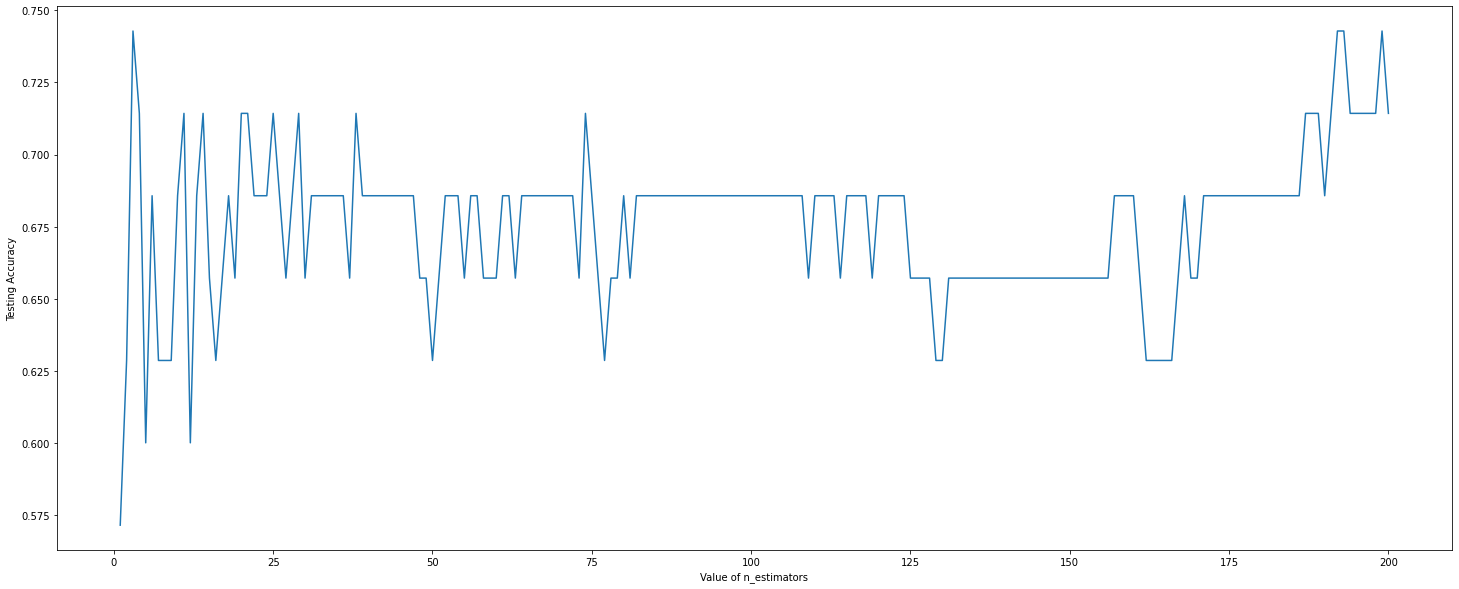

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
N=200
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_best_estimator = AdaBoostClassifier(n_estimators=best_estimator,random_state=0)
ada_best_estimator.fit(X_train, y_train)
y_pred = ada_best_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_best_estimator,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)

[[11  8]
 [ 1 15]]
              precision    recall  f1-score   support

           0       0.92      0.58      0.71        19
           1       0.65      0.94      0.77        16

    accuracy                           0.74        35
   macro avg       0.78      0.76      0.74        35
weighted avg       0.80      0.74      0.74        35

Accurecy:  0.7428571428571429




---



---



#Graddient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

gradBoost_default = GradientBoostingClassifier(random_state=0)
gradBoost_default.fit(X_train, y_train)
y_pred = gradBoost_default.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_default,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[12  7]
 [ 2 14]]
              precision    recall  f1-score   support

           0       0.86      0.63      0.73        19
           1       0.67      0.88      0.76        16

    accuracy                           0.74        35
   macro avg       0.76      0.75      0.74        35
weighted avg       0.77      0.74      0.74        35

Accurecy:  0.7428571428571429


1/150 round completed......................... Accurecy: 0.6857142857142857
2/150 round completed......................... Accurecy: 0.7428571428571429
3/150 round completed......................... Accurecy: 0.6857142857142857
4/150 round completed......................... Accurecy: 0.6857142857142857
5/150 round completed......................... Accurecy: 0.6571428571428571
6/150 round completed......................... Accurecy: 0.6571428571428571
7/150 round completed......................... Accurecy: 0.6857142857142857
8/150 round completed......................... Accurecy: 0.6857142857142857
9/150 round completed......................... Accurecy: 0.6571428571428571
10/150 round completed......................... Accurecy: 0.6571428571428571
11/150 round completed......................... Accurecy: 0.6285714285714286
12/150 round completed......................... Accurecy: 0.6571428571428571
13/150 round completed......................... Accurecy: 0.6857142857142857
14/150 r

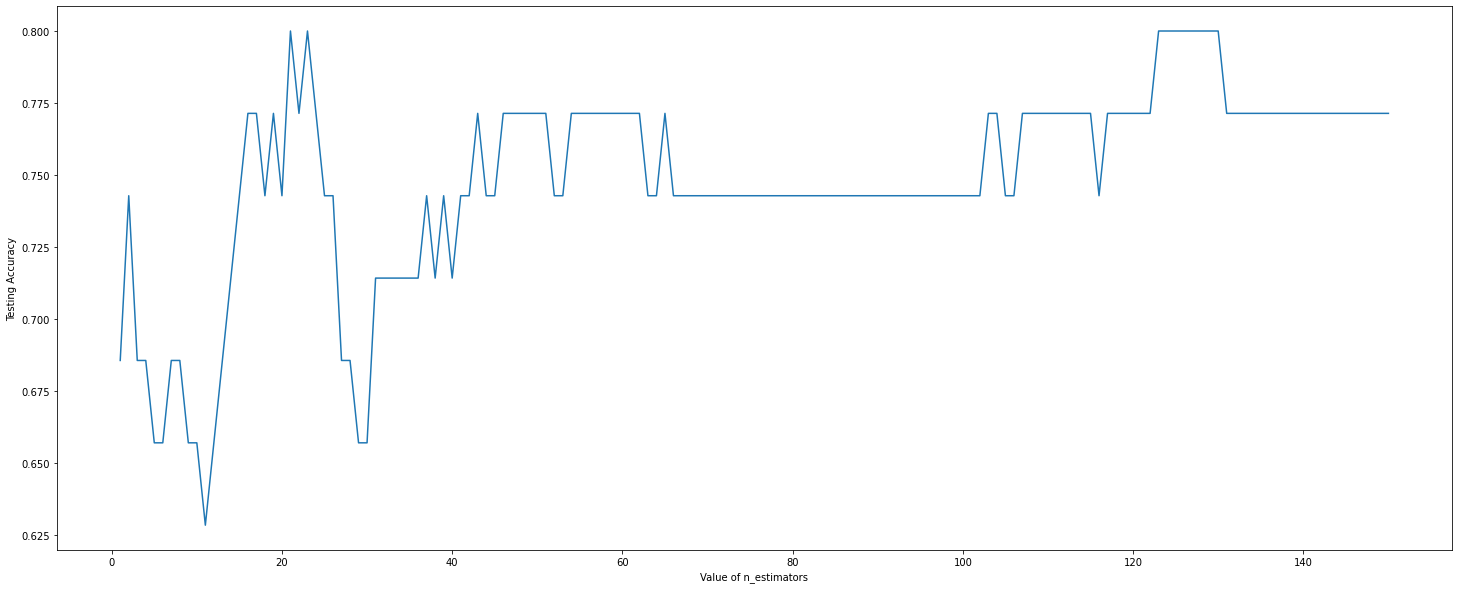

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/30 round completed......................... Accurecy: 0.7428571428571429
2/30 round completed......................... Accurecy: 0.7428571428571429
3/30 round completed......................... Accurecy: 0.7428571428571429
4/30 round completed......................... Accurecy: 0.6571428571428571
5/30 round completed......................... Accurecy: 0.6
6/30 round completed......................... Accurecy: 0.6571428571428571
7/30 round completed......................... Accurecy: 0.6571428571428571
8/30 round completed......................... Accurecy: 0.6571428571428571
9/30 round completed......................... Accurecy: 0.6571428571428571
10/30 round completed......................... Accurecy: 0.6571428571428571
11/30 round completed......................... Accurecy: 0.6571428571428571
12/30 round completed......................... Accurecy: 0.6571428571428571
13/30 round completed......................... Accurecy: 0.6571428571428571
14/30 round completed...............

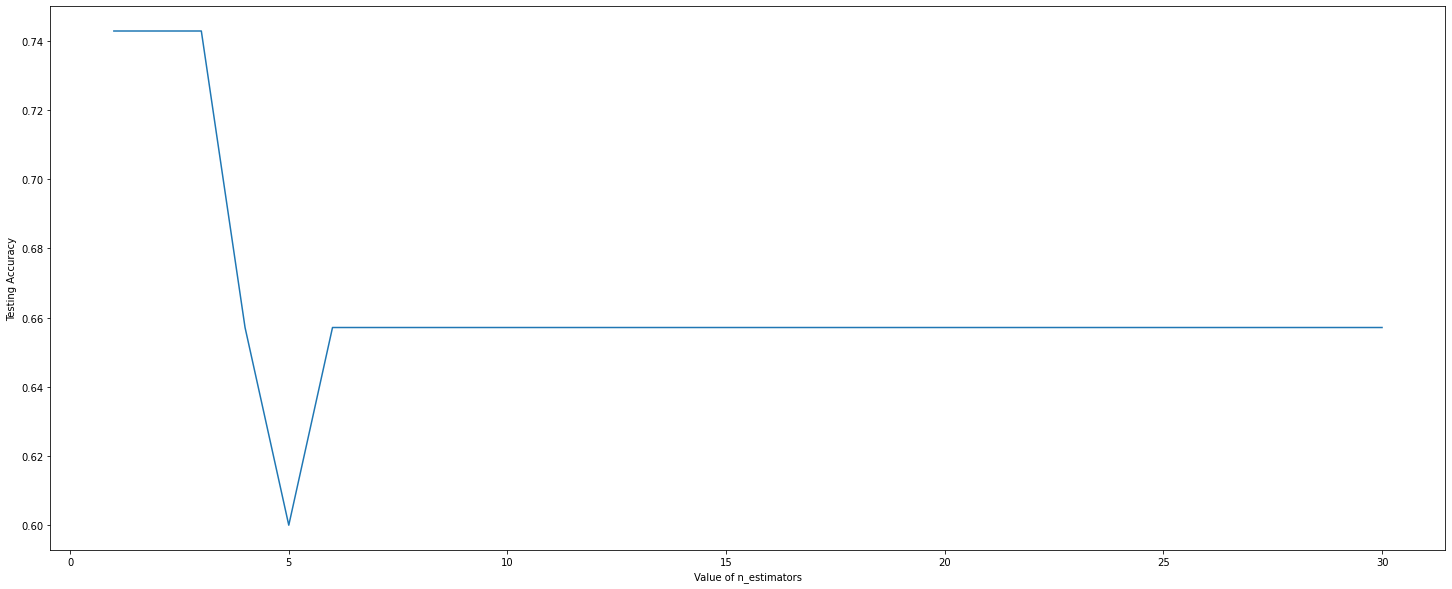

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_estimator = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
gradBoost_estimator.fit(X_train, y_train)
y_pred = gradBoost_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_estimator,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[14  5]
 [ 2 14]]
              precision    recall  f1-score   support

           0       0.88      0.74      0.80        19
           1       0.74      0.88      0.80        16

    accuracy                           0.80        35
   macro avg       0.81      0.81      0.80        35
weighted avg       0.81      0.80      0.80        35

Accurecy:  0.8


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_depth = GradientBoostingClassifier(max_depth=best_depth,random_state=0)
gradBoost_depth.fit(X_train, y_train)
y_pred = gradBoost_depth.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_depth,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[12  7]
 [ 2 14]]
              precision    recall  f1-score   support

           0       0.86      0.63      0.73        19
           1       0.67      0.88      0.76        16

    accuracy                           0.74        35
   macro avg       0.76      0.75      0.74        35
weighted avg       0.77      0.74      0.74        35

Accurecy:  0.7428571428571429


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_all = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
gradBoost_all.fit(X_train, y_train)
y_pred = gradBoost_all.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_all,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[12  7]
 [ 5 11]]
              precision    recall  f1-score   support

           0       0.71      0.63      0.67        19
           1       0.61      0.69      0.65        16

    accuracy                           0.66        35
   macro avg       0.66      0.66      0.66        35
weighted avg       0.66      0.66      0.66        35

Accurecy:  0.6571428571428571




---



---



#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier(random_state=0)
rf_default.fit(X_train, y_train)
y_pred=rf_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_default,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[11  8]
 [ 5 11]]
              precision    recall  f1-score   support

           0       0.69      0.58      0.63        19
           1       0.58      0.69      0.63        16

    accuracy                           0.63        35
   macro avg       0.63      0.63      0.63        35
weighted avg       0.64      0.63      0.63        35

Accurecy:  0.6285714285714286


1/150 round completed......................... Accurecy: 0.5714285714285714
2/150 round completed......................... Accurecy: 0.4857142857142857
3/150 round completed......................... Accurecy: 0.5714285714285714
4/150 round completed......................... Accurecy: 0.5428571428571428
5/150 round completed......................... Accurecy: 0.5428571428571428
6/150 round completed......................... Accurecy: 0.6
7/150 round completed......................... Accurecy: 0.6
8/150 round completed......................... Accurecy: 0.5428571428571428
9/150 round completed......................... Accurecy: 0.5428571428571428
10/150 round completed......................... Accurecy: 0.6
11/150 round completed......................... Accurecy: 0.6
12/150 round completed......................... Accurecy: 0.6285714285714286
13/150 round completed......................... Accurecy: 0.5714285714285714
14/150 round completed......................... Accurecy: 0.54285714

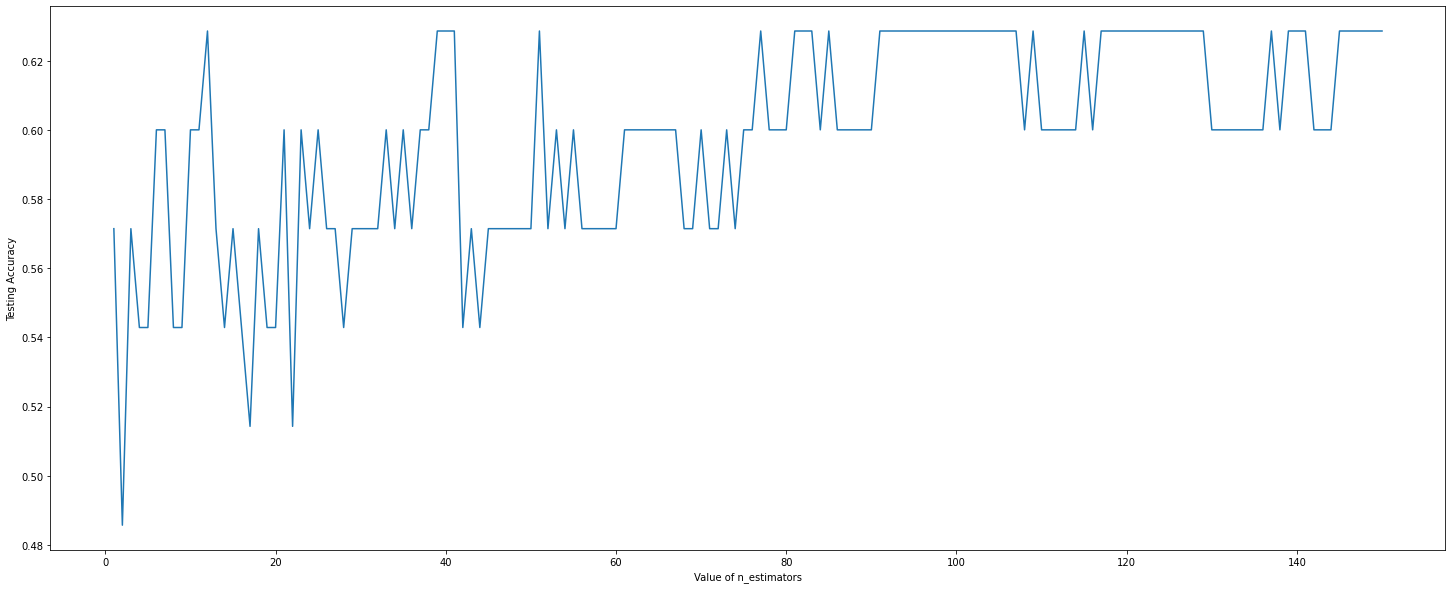

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/150 round completed......................... Accurecy: 0.5428571428571428
2/150 round completed......................... Accurecy: 0.5714285714285714
3/150 round completed......................... Accurecy: 0.6
4/150 round completed......................... Accurecy: 0.5714285714285714
5/150 round completed......................... Accurecy: 0.6571428571428571
6/150 round completed......................... Accurecy: 0.6285714285714286
7/150 round completed......................... Accurecy: 0.6285714285714286
8/150 round completed......................... Accurecy: 0.6285714285714286
9/150 round completed......................... Accurecy: 0.6285714285714286
10/150 round completed......................... Accurecy: 0.6285714285714286
11/150 round completed......................... Accurecy: 0.6285714285714286
12/150 round completed......................... Accurecy: 0.6285714285714286
13/150 round completed......................... Accurecy: 0.6285714285714286
14/150 round completed.

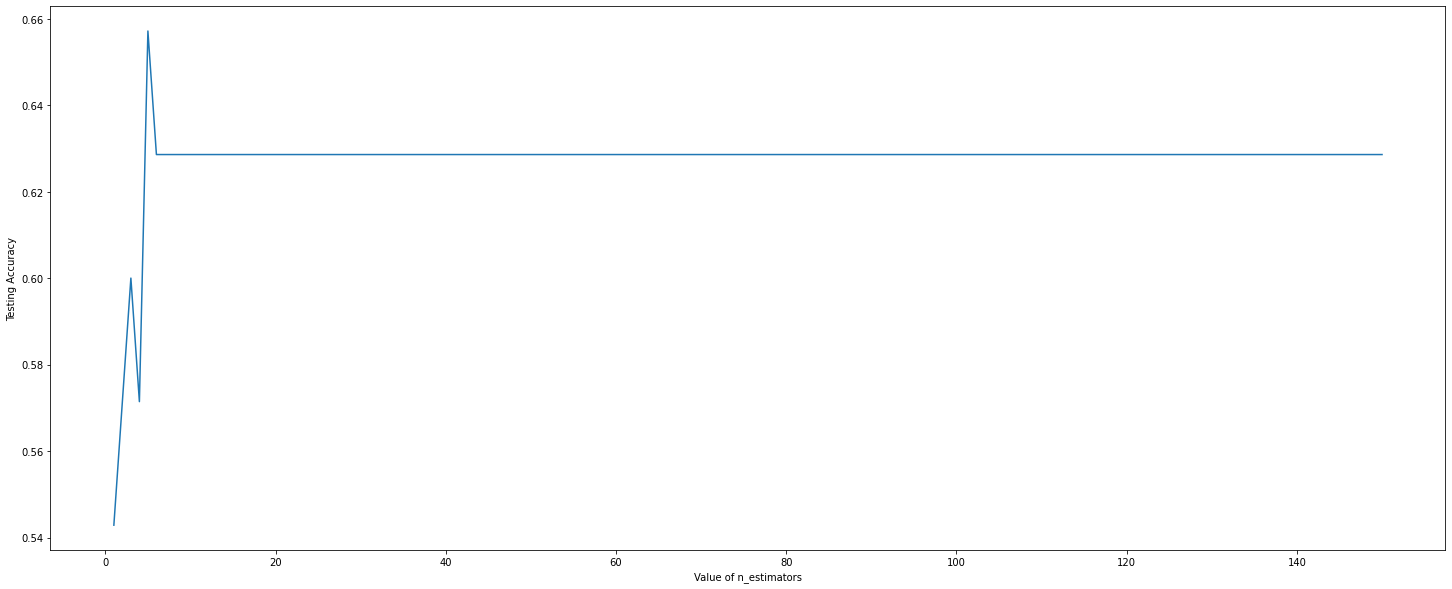

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_estimator,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[13  6]
 [ 7  9]]
              precision    recall  f1-score   support

           0       0.65      0.68      0.67        19
           1       0.60      0.56      0.58        16

    accuracy                           0.63        35
   macro avg       0.62      0.62      0.62        35
weighted avg       0.63      0.63      0.63        35

Accurecy:  0.6285714285714286


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_depth,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[12  7]
 [ 5 11]]
              precision    recall  f1-score   support

           0       0.71      0.63      0.67        19
           1       0.61      0.69      0.65        16

    accuracy                           0.66        35
   macro avg       0.66      0.66      0.66        35
weighted avg       0.66      0.66      0.66        35

Accurecy:  0.6571428571428571


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_all,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[10  9]
 [ 7  9]]
              precision    recall  f1-score   support

           0       0.59      0.53      0.56        19
           1       0.50      0.56      0.53        16

    accuracy                           0.54        35
   macro avg       0.54      0.54      0.54        35
weighted avg       0.55      0.54      0.54        35

Accurecy:  0.5428571428571428




---



---



#XGB

In [ ]:


import xgboost as xgb
xgb_deafult = xgb.XGBClassifier(random_state=0)
xgb_deafult.fit(X_train,y_train)
y_pred = xgb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_deafult,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[11  8]
 [ 3 13]]
              precision    recall  f1-score   support

           0       0.79      0.58      0.67        19
           1       0.62      0.81      0.70        16

    accuracy                           0.69        35
   macro avg       0.70      0.70      0.68        35
weighted avg       0.71      0.69      0.68        35

Accurecy:  0.6857142857142857


1/250 round completed......................... Accurecy: 0.6571428571428571
2/250 round completed......................... Accurecy: 0.6857142857142857
3/250 round completed......................... Accurecy: 0.7142857142857143
4/250 round completed......................... Accurecy: 0.6571428571428571
5/250 round completed......................... Accurecy: 0.6857142857142857
6/250 round completed......................... Accurecy: 0.6285714285714286
7/250 round completed......................... Accurecy: 0.6571428571428571
8/250 round completed......................... Accurecy: 0.6571428571428571
9/250 round completed......................... Accurecy: 0.6285714285714286
10/250 round completed......................... Accurecy: 0.6285714285714286
11/250 round completed......................... Accurecy: 0.6571428571428571
12/250 round completed......................... Accurecy: 0.6285714285714286
13/250 round completed......................... Accurecy: 0.6285714285714286
14/250 r

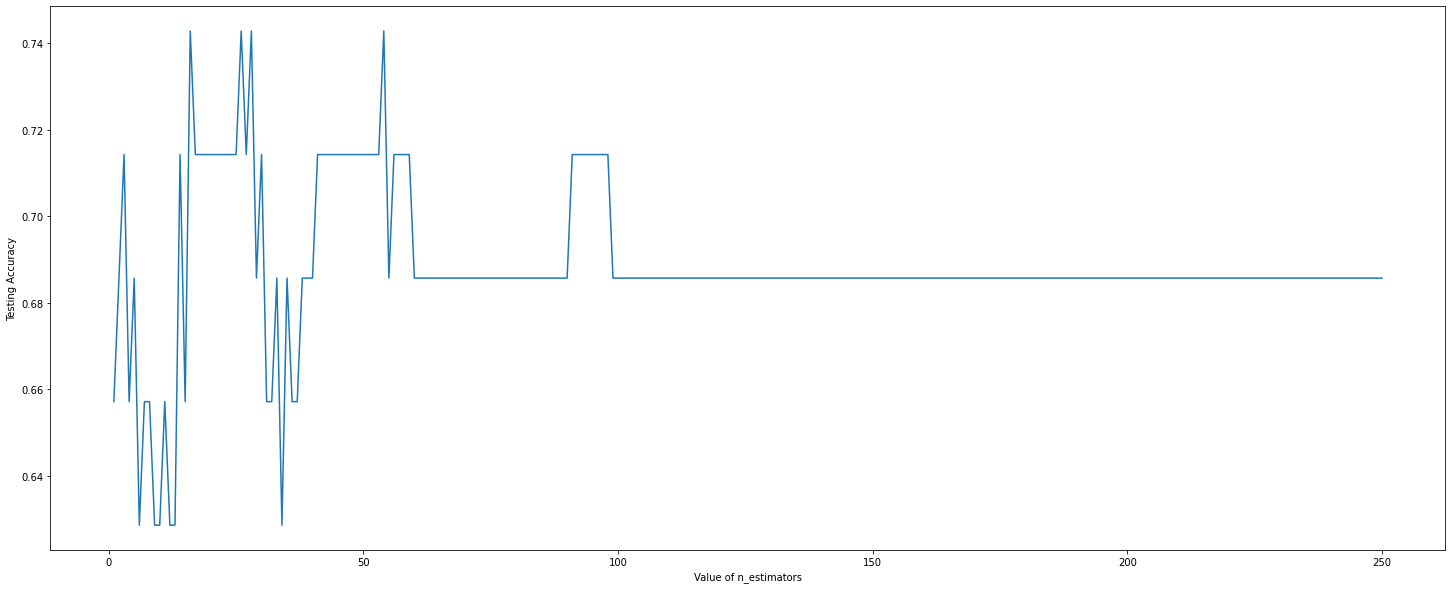

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/250 round completed......................... Accurecy: 0.7428571428571429
2/250 round completed......................... Accurecy: 0.7142857142857143
3/250 round completed......................... Accurecy: 0.6857142857142857
4/250 round completed......................... Accurecy: 0.6285714285714286
5/250 round completed......................... Accurecy: 0.6571428571428571
6/250 round completed......................... Accurecy: 0.6571428571428571
7/250 round completed......................... Accurecy: 0.7142857142857143
8/250 round completed......................... Accurecy: 0.7142857142857143
9/250 round completed......................... Accurecy: 0.7142857142857143
10/250 round completed......................... Accurecy: 0.7142857142857143
11/250 round completed......................... Accurecy: 0.7142857142857143
12/250 round completed......................... Accurecy: 0.7142857142857143
13/250 round completed......................... Accurecy: 0.7142857142857143
14/250 r

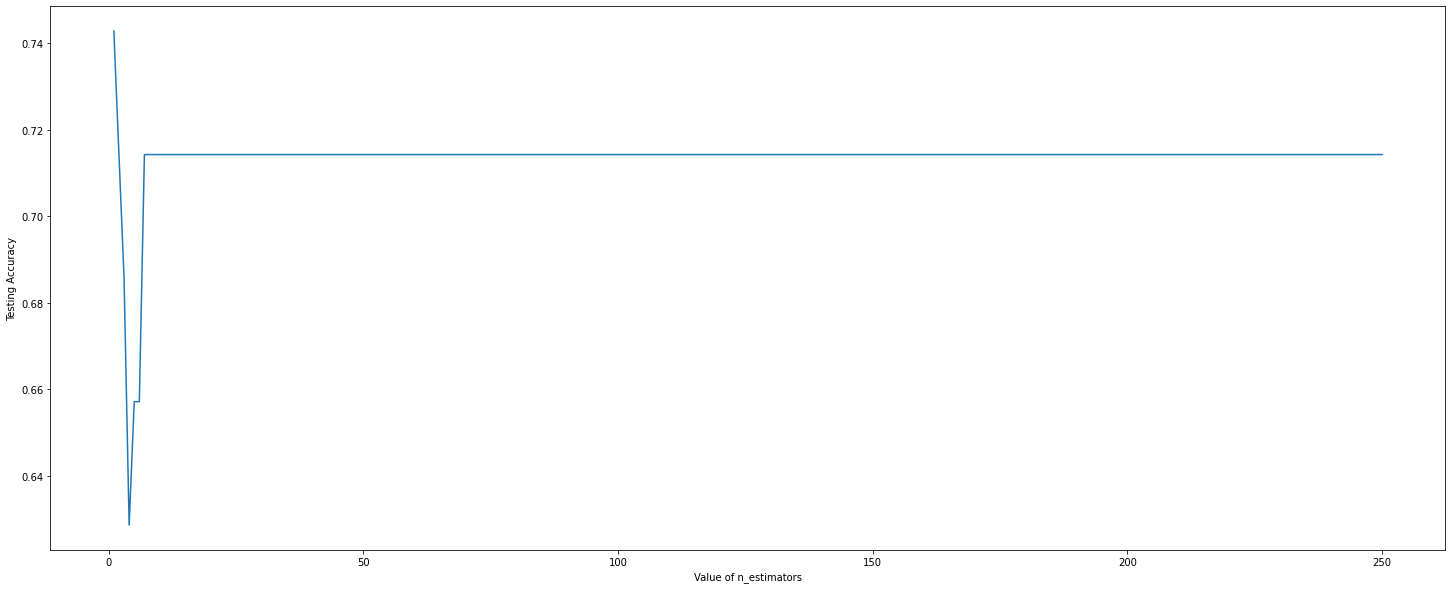

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
import xgboost as xgb
xgb_depth = xgb.XGBClassifier(max_depth=best_depth,random_state=0)
xgb_depth.fit(X_train,y_train)
y_pred = xgb_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_depth,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_depth)

[[13  6]
 [ 3 13]]
              precision    recall  f1-score   support

           0       0.81      0.68      0.74        19
           1       0.68      0.81      0.74        16

    accuracy                           0.74        35
   macro avg       0.75      0.75      0.74        35
weighted avg       0.75      0.74      0.74        35

Accurecy:  0.7428571428571429
XGBClassifier(max_depth=1)


In [ ]:
import xgboost as xgb
xgb_estimator = xgb.XGBClassifier(n_estimators=best_estimator,random_state=0)
xgb_estimator.fit(X_train,y_train)
y_pred = xgb_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_estimator,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_estimator)

[[14  5]
 [ 4 12]]
              precision    recall  f1-score   support

           0       0.78      0.74      0.76        19
           1       0.71      0.75      0.73        16

    accuracy                           0.74        35
   macro avg       0.74      0.74      0.74        35
weighted avg       0.74      0.74      0.74        35

Accurecy:  0.7428571428571429
XGBClassifier(n_estimators=16)


In [ ]:
import xgboost as xgb
xgb_all = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
xgb_all.fit(X_train,y_train)
y_pred = xgb_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_all,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[11  8]
 [ 6 10]]
              precision    recall  f1-score   support

           0       0.65      0.58      0.61        19
           1       0.56      0.62      0.59        16

    accuracy                           0.60        35
   macro avg       0.60      0.60      0.60        35
weighted avg       0.61      0.60      0.60        35

Accurecy:  0.6


#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
y_pred=knn_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_default,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[13  6]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.59      0.68      0.63        19
           1       0.54      0.44      0.48        16

    accuracy                           0.57        35
   macro avg       0.56      0.56      0.56        35
weighted avg       0.57      0.57      0.56        35

Accurecy:  0.5714285714285714


1/105 round completed......................... Accurecy: 0.5714285714285714
2/105 round completed......................... Accurecy: 0.5428571428571428
3/105 round completed......................... Accurecy: 0.6
4/105 round completed......................... Accurecy: 0.5428571428571428
5/105 round completed......................... Accurecy: 0.5714285714285714
6/105 round completed......................... Accurecy: 0.45714285714285713
7/105 round completed......................... Accurecy: 0.5714285714285714
8/105 round completed......................... Accurecy: 0.5142857142857142
9/105 round completed......................... Accurecy: 0.4857142857142857
10/105 round completed......................... Accurecy: 0.4857142857142857
11/105 round completed......................... Accurecy: 0.42857142857142855
12/105 round completed......................... Accurecy: 0.45714285714285713
13/105 round completed......................... Accurecy: 0.45714285714285713
14/105 round comple

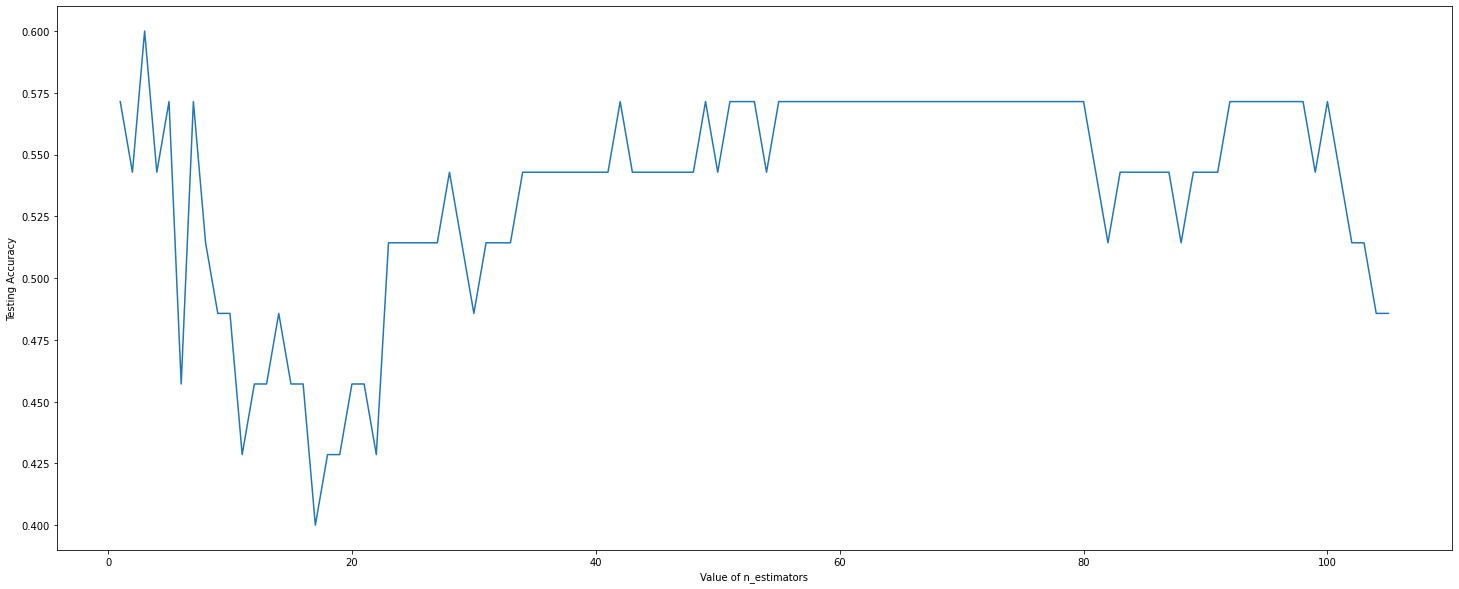

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Neighbors=105
k_range = range (1,Neighbors+1)
scores={}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred=knn.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(Neighbors)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best=list(scores.keys())[scores_list.index(max(scores_list))]
print(best)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_neighbors = KNeighborsClassifier(n_neighbors=best)
knn_neighbors.fit(X_train, y_train)
y_pred=knn_neighbors.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_neighbors,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[13  6]
 [ 8  8]]
              precision    recall  f1-score   support

           0       0.62      0.68      0.65        19
           1       0.57      0.50      0.53        16

    accuracy                           0.60        35
   macro avg       0.60      0.59      0.59        35
weighted avg       0.60      0.60      0.60        35

Accurecy:  0.6


#NB

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_deafult = GaussianNB()
nb_deafult.fit(X_train, y_train)
y_pred = nb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(nb_deafult,6,'GaussianNB')]=accuracy_score(y_test, y_pred)

[[12  7]
 [ 7  9]]
              precision    recall  f1-score   support

           0       0.63      0.63      0.63        19
           1       0.56      0.56      0.56        16

    accuracy                           0.60        35
   macro avg       0.60      0.60      0.60        35
weighted avg       0.60      0.60      0.60        35

Accurecy:  0.6




---



---



#Result

In [ ]:
for i in result:
  print(i[0],i[1]," : ",result[i])
  print("---------------------------------------------------------------")
  print()

AdaBoostClassifier(random_state=0) 1  :  0.6285714285714286
---------------------------------------------------------------

AdaBoostClassifier(n_estimators=3, random_state=0) 1  :  0.7428571428571429
---------------------------------------------------------------

GradientBoostingClassifier(random_state=0) 2  :  0.7428571428571429
---------------------------------------------------------------

GradientBoostingClassifier(n_estimators=21, random_state=0) 2  :  0.8
---------------------------------------------------------------

GradientBoostingClassifier(max_depth=1, random_state=0) 2  :  0.7428571428571429
---------------------------------------------------------------

GradientBoostingClassifier(max_depth=1, n_estimators=21, random_state=0) 2  :  0.6571428571428571
---------------------------------------------------------------

RandomForestClassifier(random_state=0) 3  :  0.6285714285714286
---------------------------------------------------------------

RandomForestClassifier(n_est

In [ ]:
sorted_list=[]
sorted_list = sorted(result, key=result.get,reverse=True)

for i in sorted_list:
  print(i,"  : ",result[i])
  print("-------------------------------------------------------------------------------------------------")

print(sorted_list)


flage=[]
best_models=[]
it=0

for i in sorted_list:
  if it==4:
    break

  if i[1] not in flage:
    best_models.append((i[0],i[2]))
    flage.append(i[1])
    it+=1


(GradientBoostingClassifier(n_estimators=21, random_state=0), 2, 'GradientBoostingClassifier')   :  0.8
-------------------------------------------------------------------------------------------------
(AdaBoostClassifier(n_estimators=3, random_state=0), 1, 'AdaBoostClassifier')   :  0.7428571428571429
-------------------------------------------------------------------------------------------------
(GradientBoostingClassifier(random_state=0), 2, 'GradientBoostingClassifier')   :  0.7428571428571429
-------------------------------------------------------------------------------------------------
(GradientBoostingClassifier(max_depth=1, random_state=0), 2, 'GradientBoostingClassifier')   :  0.7428571428571429
-------------------------------------------------------------------------------------------------
(XGBClassifier(max_depth=1), 4, 'xgboost')   :  0.7428571428571429
-------------------------------------------------------------------------------------------------
(XGBClassifier(n_est

In [ ]:
print("best_models:")
for i in best_models:
  print(i)


best_models:
(GradientBoostingClassifier(n_estimators=21, random_state=0), 'GradientBoostingClassifier')
(AdaBoostClassifier(n_estimators=3, random_state=0), 'AdaBoostClassifier')
(XGBClassifier(max_depth=1), 'xgboost')
(RandomForestClassifier(max_depth=5, random_state=0), 'RandomForestClassifier')


In [ ]:
len(best_models)

4

#Testing Accuracy For Best 4 Models

In [ ]:

for i in best_models:
  print("--------------------------------------------------")
  print(i[0])
  y_pred=i[0].predict(X_train)
  print(confusion_matrix(y_train, y_pred))
  print(classification_report(y_train,y_pred))
  print("Accurecy: ",accuracy_score(y_train, y_pred))

--------------------------------------------------
GradientBoostingClassifier(n_estimators=21, random_state=0)
[[66  1]
 [ 2 61]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.97      0.98        63

    accuracy                           0.98       130
   macro avg       0.98      0.98      0.98       130
weighted avg       0.98      0.98      0.98       130

Accurecy:  0.9769230769230769
--------------------------------------------------
AdaBoostClassifier(n_estimators=3, random_state=0)
[[57 10]
 [14 49]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.83        67
           1       0.83      0.78      0.80        63

    accuracy                           0.82       130
   macro avg       0.82      0.81      0.81       130
weighted avg       0.82      0.82      0.82       130

Accurecy:  0.8153846153846154
-----------------------------------

#SHAP

In [ ]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 13.8 MB/s 


#SHAP MODEL 1

In [ ]:
print("Models: ",best_models[0][1])

explainer = shap.Explainer(best_models[0][0].predict, X_test)

shap_values1 = explainer(X_test)
features_names=list_of_feat

if 'Subjects' in features_names:
  features_names.pop(0)

Models:  GradientBoostingClassifier


Models:  GradientBoostingClassifier(n_estimators=21, random_state=0)


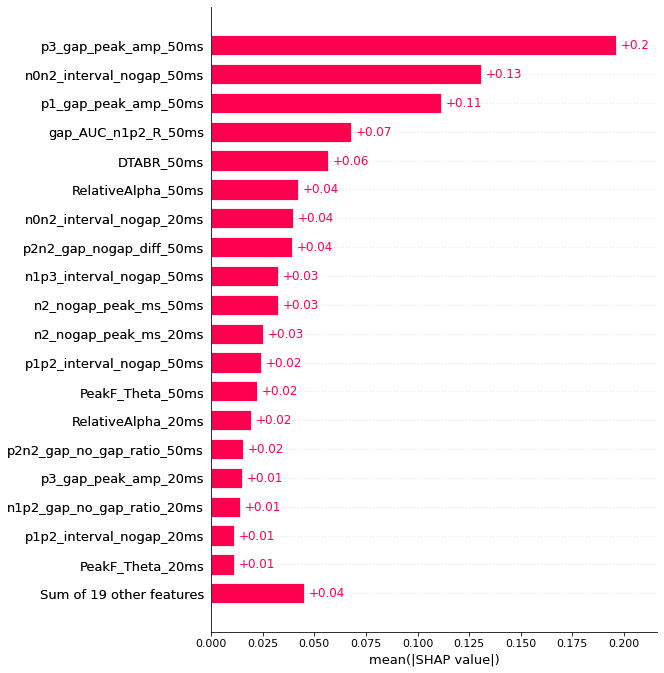

In [ ]:
print("Models: ",best_models[0][0])
shap.plots.bar(shap_values1,max_display=20)

Models:  GradientBoostingClassifier(n_estimators=21, random_state=0)


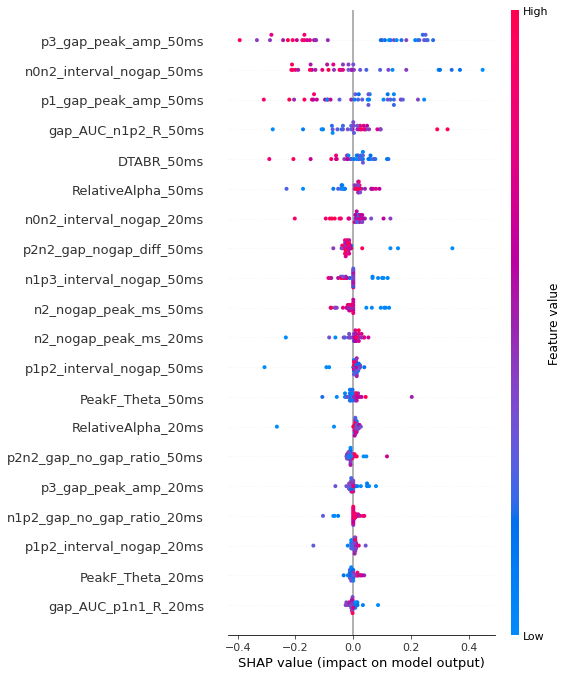

In [ ]:
print("Models: ",best_models[0][0])
shap.summary_plot(shap_values1,max_display=20,feature_names=features_names)

**Local Explanation** <br>
You can change the index of <i>shap_values1[index]</i> to accure the desired output. 

Models:  GradientBoostingClassifier(n_estimators=21, random_state=0)


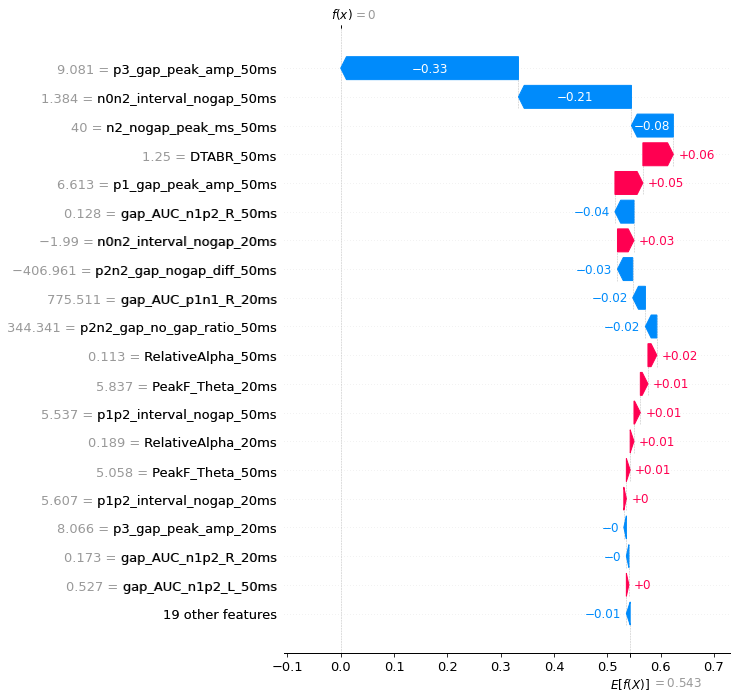

In [ ]:
print("Models: ",best_models[0][0])
shap.plots.waterfall(shap_values1[2],max_display=20)

Models:  GradientBoostingClassifier(n_estimators=21, random_state=0)


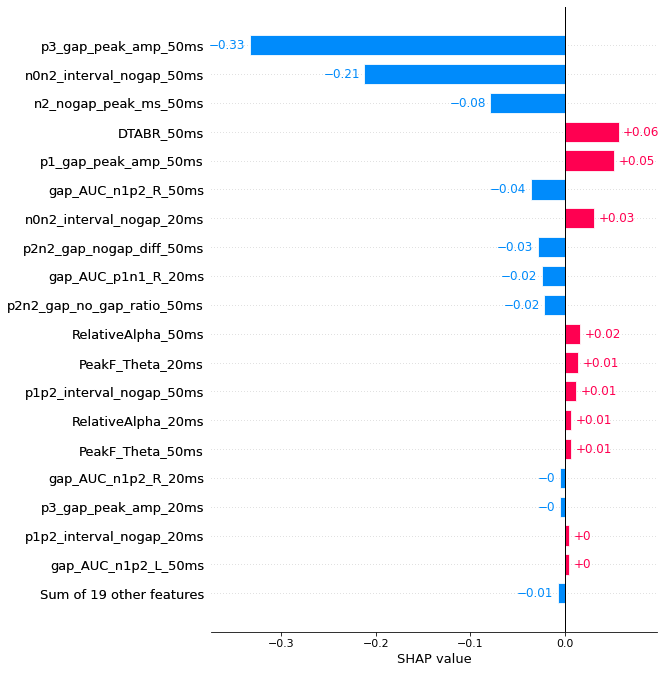

In [ ]:
print("Models: ",best_models[0][0])
shap.plots.bar(shap_values1[2],max_display=20)

#SHAP MODEL2

In [ ]:
print("Models: ",best_models[1][0])

explainer = shap.Explainer(best_models[1][0].predict, X_test)

shap_values2 = explainer(X_test)
features_names=list_of_feat

Models:  AdaBoostClassifier(n_estimators=3, random_state=0)


**Global Explanation**

Models:  AdaBoostClassifier(n_estimators=3, random_state=0)


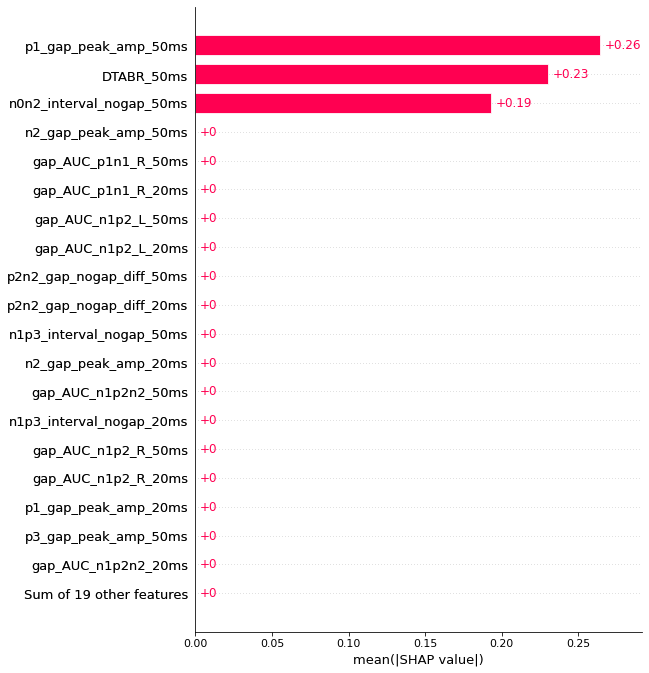

In [ ]:
print("Models: ",best_models[1][0])
shap.plots.bar(shap_values2,max_display=20)

Models:  AdaBoostClassifier(n_estimators=3, random_state=0)


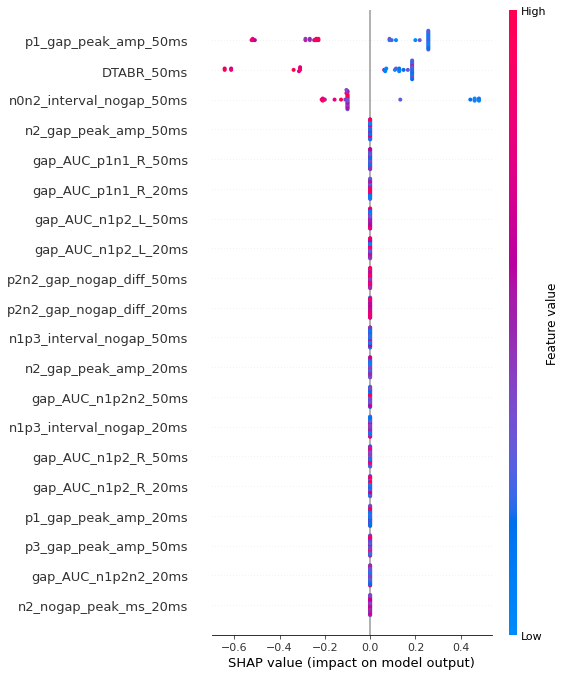

In [ ]:
print("Models: ",best_models[1][0])
shap.summary_plot(shap_values2,max_display=20,feature_names=features_names)

**Local Explanation**

Models:  AdaBoostClassifier(n_estimators=3, random_state=0)


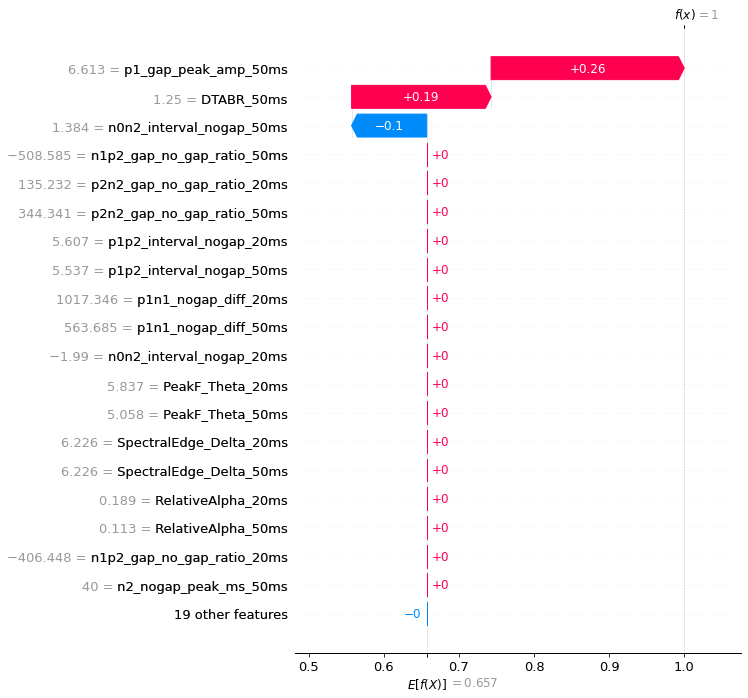

In [ ]:
print("Models: ",best_models[1][0])
shap.plots.waterfall(shap_values2[2],max_display=20)

Models:  AdaBoostClassifier(n_estimators=3, random_state=0)


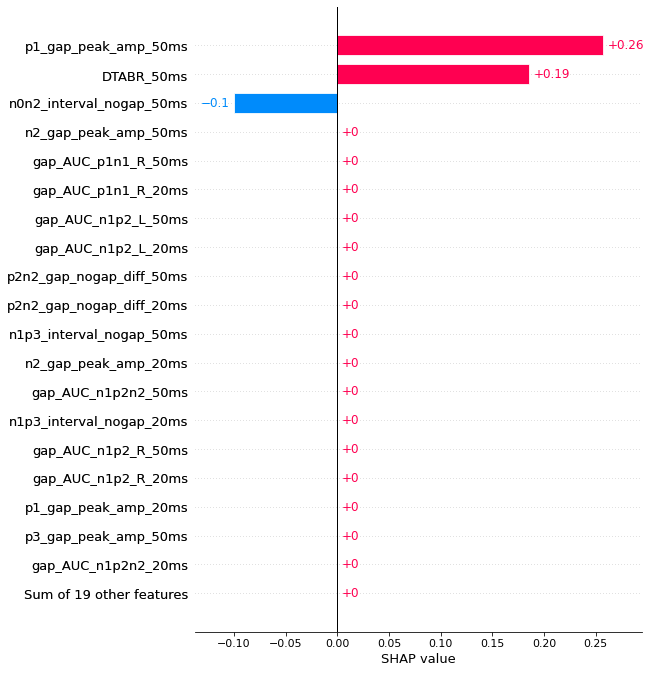

In [ ]:
print("Models: ",best_models[1][0])
shap.plots.bar(shap_values2[2],max_display=20)

#SHAP MODEL 3

In [ ]:
print("Models: ",best_models[2][0])

explainer = shap.Explainer(best_models[2][0].predict, X_test)

shap_values3 = explainer( X_test)
features_names=list_of_feat

Models:  XGBClassifier(max_depth=1)


**Global**

Models:  XGBClassifier(max_depth=1)


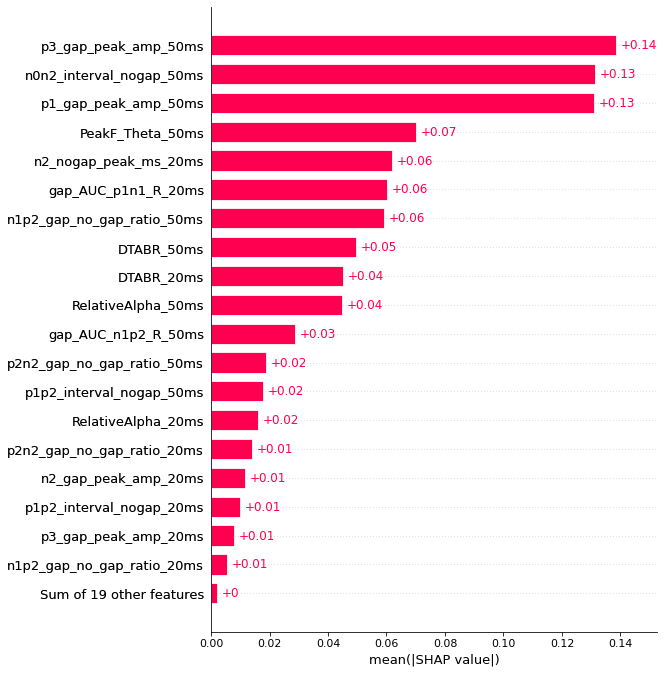

In [ ]:
print("Models: ",best_models[2][0])
shap.plots.bar(shap_values3,max_display=20)

Models:  XGBClassifier(max_depth=1)


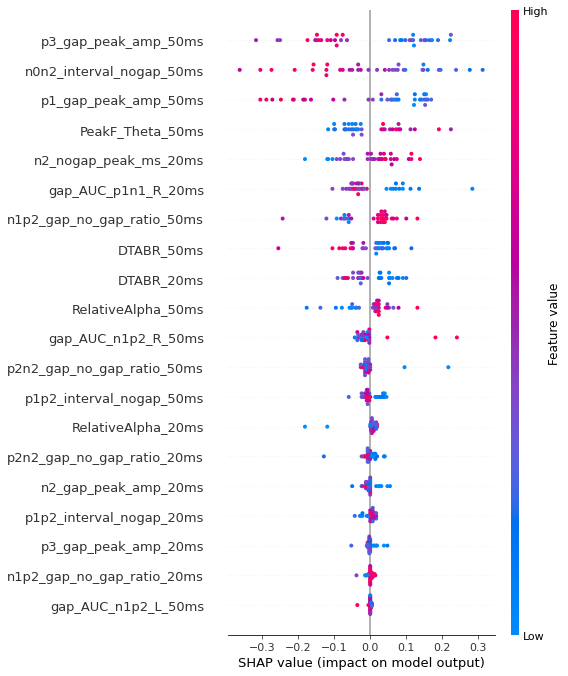

In [ ]:
print("Models: ",best_models[2][0])
shap.summary_plot(shap_values3,max_display=20,feature_names=features_names)

**LOCAL**

Models:  XGBClassifier(max_depth=1)


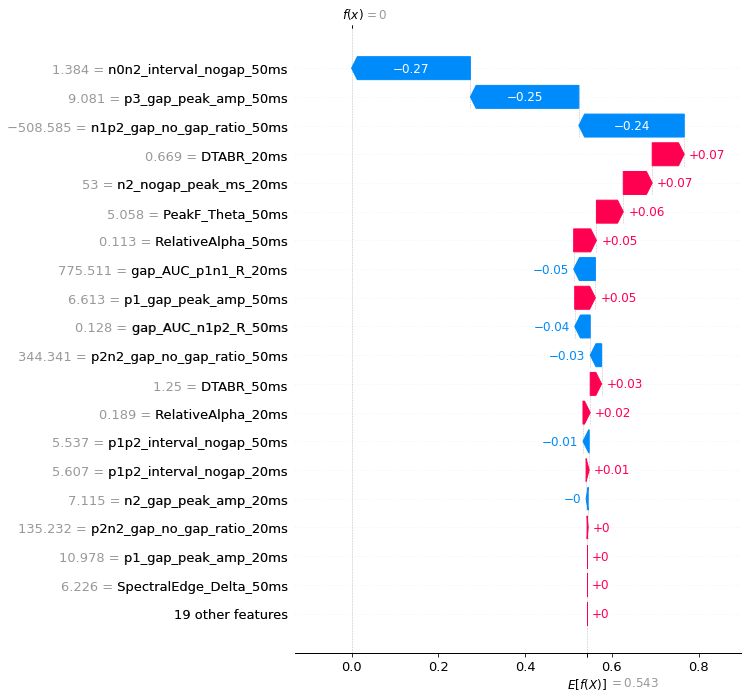

In [ ]:
print("Models: ",best_models[2][0])
shap.plots.waterfall(shap_values3[2],max_display=20)

Models:  XGBClassifier(max_depth=1)


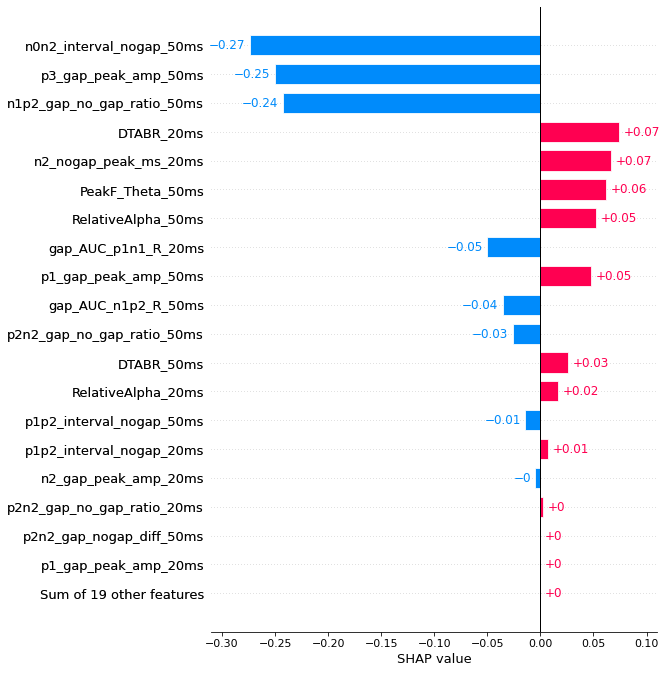

In [ ]:
print("Models: ",best_models[2][0])
shap.plots.bar(shap_values3[2],max_display=20)

#Confusion Matrix For Testing

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names


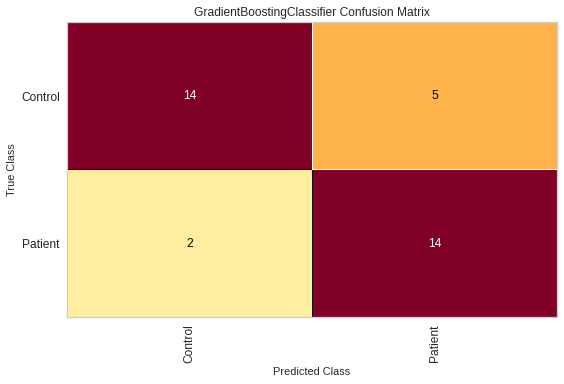

In [ ]:

from yellowbrick.classifier import ConfusionMatrix


cm = ConfusionMatrix(best_models[0][0], classes=classes)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

X does not have valid feature names, but AdaBoostClassifier was fitted with feature names


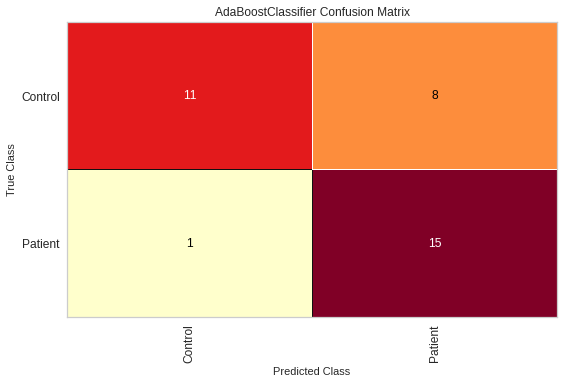

In [ ]:
cm2 = ConfusionMatrix(best_models[1][0], classes=classes)

cm2.fit(X_train, y_train)
cm2.score(X_test, y_test)
cm2.show()

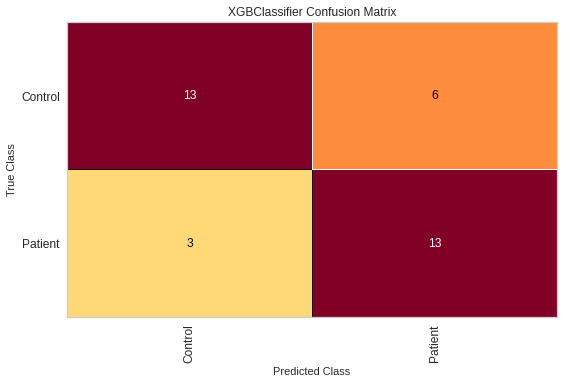

In [ ]:


cm3 = ConfusionMatrix(best_models[2][0], classes=classes)

cm3.fit(X_train, y_train)
cm3.score(X_test, y_test)
cm3.show()

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


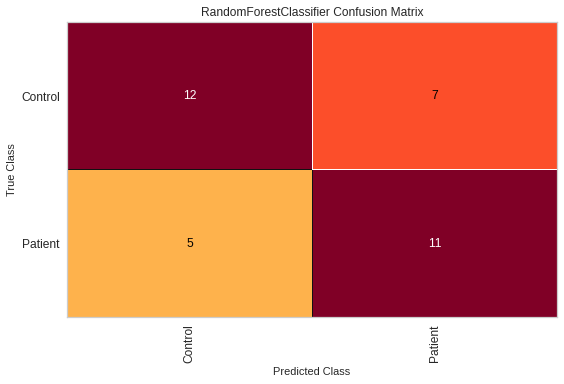

In [ ]:
cm4 = ConfusionMatrix(best_models[3][0], classes=classes)

cm4.fit(X_train, y_train)
cm4.score(X_test, y_test)
cm4.show()

#Confusion Matrix For Training

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names


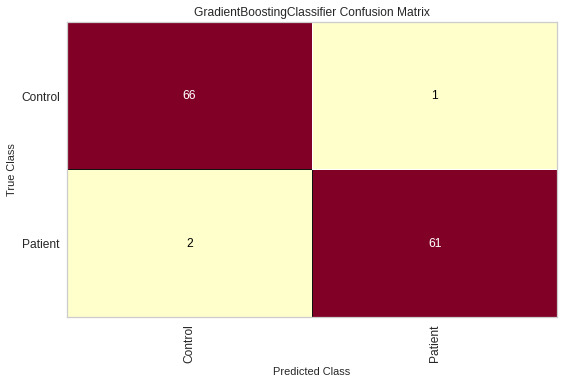

In [ ]:
cm1 = ConfusionMatrix(best_models[0][0], classes=classes)

cm1.fit(X_train, y_train)
cm1.score(X_train, y_train)
cm1.show()

X does not have valid feature names, but AdaBoostClassifier was fitted with feature names


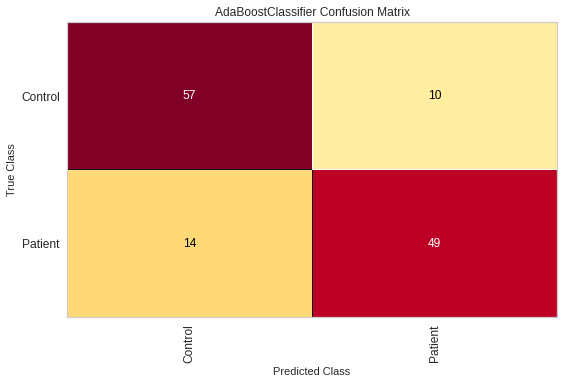

In [ ]:
cm1 = ConfusionMatrix(best_models[1][0], classes=classes)

cm1.fit(X_train, y_train)
cm1.score(X_train, y_train)
cm1.show()

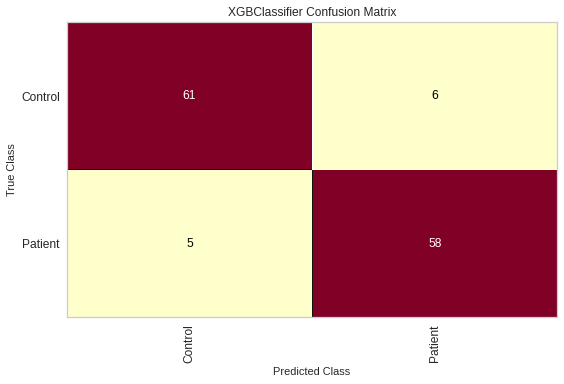

In [ ]:
cm1 = ConfusionMatrix(best_models[2][0], classes=classes)

cm1.fit(X_train, y_train)
cm1.score(X_train, y_train)
cm1.show()

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


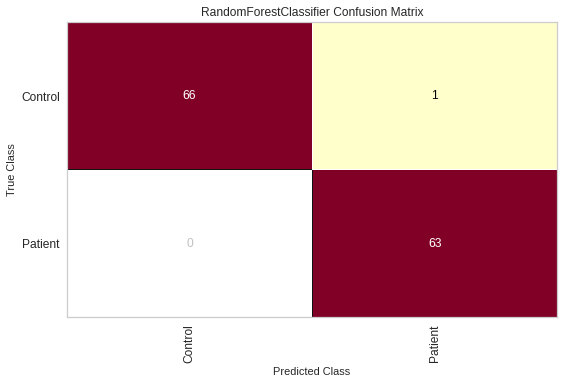

In [ ]:
cm1 = ConfusionMatrix(best_models[3][0], classes=classes)

cm1.fit(X_train, y_train)
cm1.score(X_train, y_train)
cm1.show()

#Result CSV<br>
Predicted and Actual Row will be added at the end index

In [ ]:
def reverse_transfrom(my_list):
  for i in range(len(my_list)):
    if my_list[i] == 0:
      my_list[i] = 'Control'
    else:
      my_list[i] = 'Patient'
  return my_list

In [ ]:
for i in range(len(best_models)):
  temp=X_test_with_subject

  prediction_cls = reverse_transfrom(list(best_models[i][0].predict(X_test[0:])))
  actual_cls = reverse_transfrom(list(y_test[0:]))

  temp["Actual"] = actual_cls
  temp["Predicted"] = prediction_cls

  temp.to_csv(best_models[i][1]+".csv")


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

#ROC Comparaing Machine Learning Models

###ROC AUC Testing

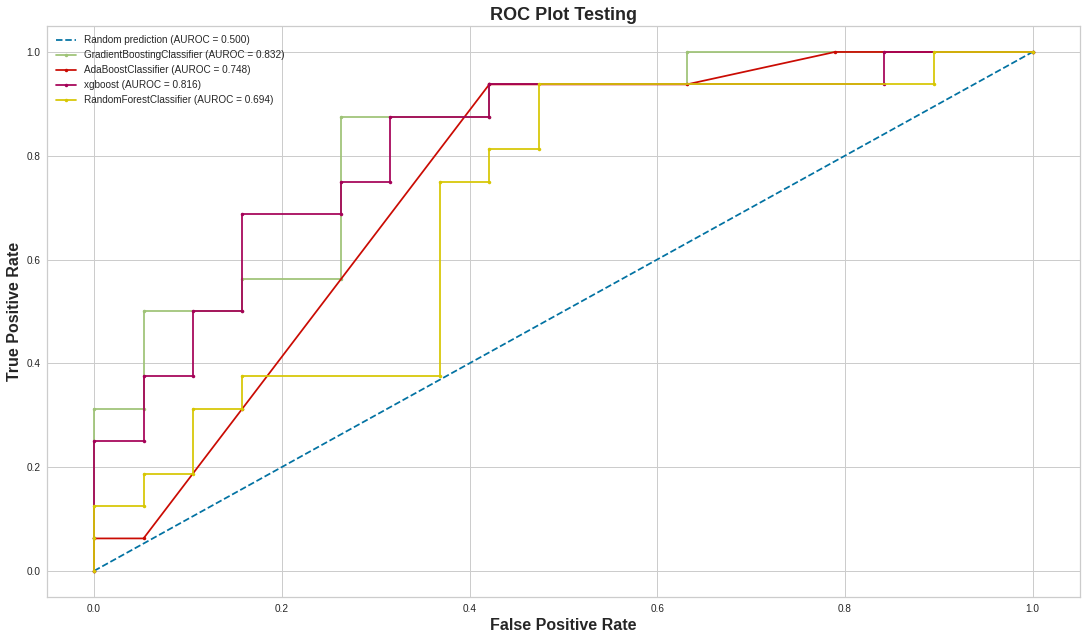

In [ ]:

r_probs = [0 for _ in range(len(y_test))]
model1_probs = best_models[0][0].predict_proba(X_test)
model2_probs = best_models[1][0].predict_proba(X_test)
if len(best_models)>2:
  model3_probs=  best_models[2][0].predict_proba(X_test)
if len(best_models)>3:
  model4_probs=  best_models[3][0].predict_proba(X_test)


model1_probs = model1_probs[:, 1]
model2_probs = model2_probs[:, 1]
if len(best_models)>2:
  model3_probs=  model3_probs[:, 1]
if len(best_models)>3:
  model4_probs=  model4_probs[:, 1]



from sklearn.metrics import roc_curve, roc_auc_score

r_auc = roc_auc_score(y_test, r_probs)
model1_auc = roc_auc_score(y_test, model1_probs)
model2_auc = roc_auc_score(y_test, model2_probs)
if len(best_models)>2:
  model3_auc = roc_auc_score(y_test, model3_probs)
if len(best_models)>3:
  model4_auc = roc_auc_score(y_test, model4_probs)



r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
model1_fpr, model1_tpr, _ = roc_curve(y_test, model1_probs)
model2_fpr, model2_tpr, _ = roc_curve(y_test, model2_probs)
if len(best_models)>2:
  model3_fpr, model3_tpr, _ = roc_curve(y_test, model3_probs)
if len(best_models)>3:
  model4_fpr, model4_tpr, _ = roc_curve(y_test, model4_probs)



import matplotlib.pyplot as plt
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(model1_fpr, model1_tpr, marker='.', label=best_models[0][1]+' (AUROC = %0.3f)' % model1_auc)
plt.plot(model2_fpr, model2_tpr, marker='.', label=best_models[1][1]+' (AUROC = %0.3f)' % model2_auc)
if len(best_models)>2:
  plt.plot(model3_fpr, model3_tpr, marker='.', label=best_models[2][1]+' (AUROC = %0.3f)' % model3_auc)
if len(best_models)>3:
  plt.plot(model4_fpr, model4_tpr, marker='.', label=best_models[3][1]+' (AUROC = %0.3f)' % model4_auc)

# Title
plt.title('ROC Plot Testing',fontsize= 18, fontweight='bold')
plt.xlabel('False Positive Rate',fontweight='bold',fontsize=16)
plt.ylabel('True Positive Rate',fontweight='bold',fontsize=16)
plt.legend() 
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('ROC_Testing.png', dpi=100)
plt.show()

###ROC-AUC For Training Phase





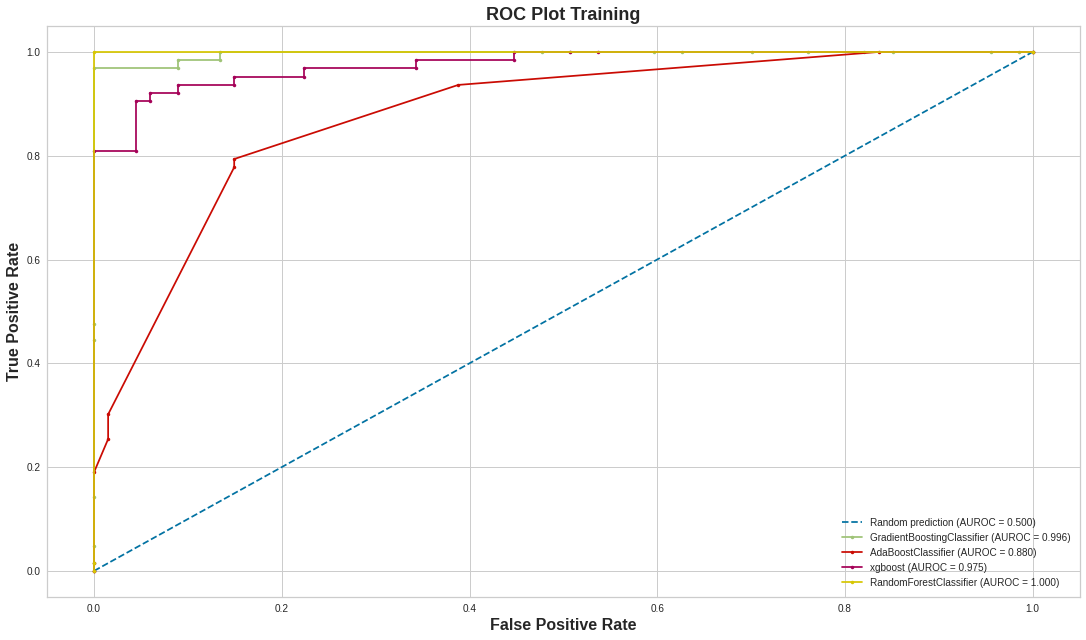

In [ ]:

r_probs = [0 for _ in range(len(y_train))]
model1_probs = best_models[0][0].predict_proba(X_train)
model2_probs = best_models[1][0].predict_proba(X_train)
if len(best_models)>2:
  model3_probs=  best_models[2][0].predict_proba(X_train)
if len(best_models)>3:
  model4_probs=  best_models[3][0].predict_proba(X_train)


model1_probs = model1_probs[:, 1]
model2_probs = model2_probs[:, 1]
if len(best_models)>2:
  model3_probs=  model3_probs[:, 1]
if len(best_models)>3:
  model4_probs=  model4_probs[:, 1]



from sklearn.metrics import roc_curve, roc_auc_score

r_auc = roc_auc_score(y_train, r_probs)
model1_auc = roc_auc_score(y_train, model1_probs)
model2_auc = roc_auc_score(y_train, model2_probs)
if len(best_models)>2:
  model3_auc = roc_auc_score(y_train, model3_probs)
if len(best_models)>3:
  model4_auc = roc_auc_score(y_train, model4_probs)



r_fpr, r_tpr, _ = roc_curve(y_train, r_probs)
model1_fpr, model1_tpr, _ = roc_curve(y_train, model1_probs)
model2_fpr, model2_tpr, _ = roc_curve(y_train, model2_probs)
if len(best_models)>2:
  model3_fpr, model3_tpr, _ = roc_curve(y_train, model3_probs)
if len(best_models)>3:
  model4_fpr, model4_tpr, _ = roc_curve(y_train, model4_probs)



import matplotlib.pyplot as plt
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(model1_fpr, model1_tpr, marker='.', label=best_models[0][1]+' (AUROC = %0.3f)' % model1_auc)
plt.plot(model2_fpr, model2_tpr, marker='.', label=best_models[1][1]+' (AUROC = %0.3f)' % model2_auc)
if len(best_models)>2:
  plt.plot(model3_fpr, model3_tpr, marker='.', label=best_models[2][1]+' (AUROC = %0.3f)' % model3_auc)
if len(best_models)>3:
  plt.plot(model4_fpr, model4_tpr, marker='.', label=best_models[3][1]+' (AUROC = %0.3f)' % model4_auc)

# Title
plt.title('ROC Plot Training',fontsize= 18, fontweight='bold')
plt.xlabel('False Positive Rate',fontweight='bold',fontsize=16)
plt.ylabel('True Positive Rate',fontweight='bold',fontsize=16)
plt.legend() 
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('ROC_Training.png', dpi=100)
plt.show()

#Cross_val_score function

In [ ]:
from sklearn.model_selection import cross_val_score

k=5
for i in result:
  print(i[0]," -> Accuracy: ",result[i])
  l=list(cross_val_score(i[0],X_new.iloc[:,1:], y_new,cv=k))
  avg=sum(l)/k
  print(i[0]," -> AVG Accurecy After CV: "+str(avg)+ " (For "+str(k)+" Fold)")
  print("--------------------------------------------------------------------------")

AdaBoostClassifier(random_state=0)  -> Accuracy:  0.6285714285714286
AdaBoostClassifier(random_state=0)  -> AVG Accurecy After CV: 0.6848484848484848 (For 5 Fold)
--------------------------------------------------------------------------
AdaBoostClassifier(n_estimators=3, random_state=0)  -> Accuracy:  0.7428571428571429
AdaBoostClassifier(n_estimators=3, random_state=0)  -> AVG Accurecy After CV: 0.7030303030303031 (For 5 Fold)
--------------------------------------------------------------------------
GradientBoostingClassifier(random_state=0)  -> Accuracy:  0.7428571428571429
GradientBoostingClassifier(random_state=0)  -> AVG Accurecy After CV: 0.7454545454545454 (For 5 Fold)
--------------------------------------------------------------------------
GradientBoostingClassifier(n_estimators=21, random_state=0)  -> Accuracy:  0.8
GradientBoostingClassifier(n_estimators=21, random_state=0)  -> AVG Accurecy After CV: 0.7272727272727273 (For 5 Fold)
----------------------------------------

In [ ]:


def CV_ROC(model,folds):
  import matplotlib.pyplot as plt

  from sklearn import svm
  from sklearn.metrics import auc
  from sklearn.metrics import RocCurveDisplay
  from sklearn.model_selection import StratifiedKFold



  cv = StratifiedKFold(n_splits=folds)




  fig1 = plt.figure(figsize=[12,12])
  ax1 = fig1.add_subplot(111,aspect = 'equal')

  tprs = []
  aucs = []
  mean_fpr = np.linspace(0,1,100)
  i = 1
  for train,test in cv.split(X_new.iloc[:,1:], y_new.values):
      prediction = model.fit(X_new.iloc[:,1:].values[train], y_new.values[train]).predict_proba(X_new.iloc[:,1:].values[test])
      fpr, tpr, t = roc_curve(y_new.values[test], prediction[:, 1])
      tprs.append(np.interp(mean_fpr, fpr, tpr))
      roc_auc = auc(fpr, tpr)
      aucs.append(roc_auc)
      plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
      i= i+1

  plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
  mean_tpr = np.mean(tprs, axis=0)
  mean_auc = auc(mean_fpr, mean_tpr)
  plt.plot(mean_fpr, mean_tpr, color='blue',
          label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC-> '+str(model))
  plt.legend(loc="lower right")
  plt.show()

In [ ]:
import ipywidgets as widgets
from IPython.display import display


models=[]

for i in result:
  models.append(i[0])

new_keys=[]
for i in models:
  i=widgets.Checkbox(
    value=False,
    description=str(i),
    disabled=False,
    indent=False
    )
  display(i)
  new_keys.append(i)



Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=3, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=21, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=1, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=1, n_estimators=21, random_state=0)', …

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=12, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=5, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=5, n_estimators=12, random_state=0)', inde…

Checkbox(value=False, description='XGBClassifier()', indent=False)

Checkbox(value=False, description='XGBClassifier(max_depth=1)', indent=False)

Checkbox(value=False, description='XGBClassifier(n_estimators=16)', indent=False)

Checkbox(value=False, description='XGBClassifier(max_depth=1, n_estimators=16)', indent=False)

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=3)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

<font color="apple green">Just mark the above cell to select the Multiple Algorithms for ROC CV graph. <font color="sky blue"><b>Then run the cell below.</b></font> You do not need to run above cell everytime...</font><font color='red'><b>Do not run above cell after selecting</b></font>

In [ ]:
# run this cell after selecting
k_fold=5

for i in range(len(new_keys)):
  if new_keys[i].value ==True:
    CV_ROC(models[i],5)
    print("-----------------------------------------------------------------")
    print("-----------------------------------------------------------------")

#ANN Classification

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(250, input_shape=(30,), activation='relu'), # input laye
    keras.layers.Dense(150, activation='sigmoid'),
    keras.layers.Dense(75, activation='softmax')                    # output layer
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=30)

Epoch 1/30


ValueError: ignored

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_predicted_labels))
print(classification_report(y_test,y_predicted_labels))
print("Accurecy: ",accuracy_score(y_test, y_predicted_labels))